# Python and R

This setup allows you to use *Python* and *R* in the same notebook.

To set up a similar notebook, see quickstart instructions here:

https://github.com/dmil/jupyter-quickstart

Some thoughts on why I like this setup and how I use it at the [end](notebook.ipynb#Thoughts) of  this notebook.

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

This is a Python notebook, but below is an R cell. The `%%R` at the top of the cell indicates that the code in this cell will be R code.

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


Below is a Python cell, there is nothing at the top of the cell because it is python by default.

Now another R cell, `%%R -i df` indicates that this is an R cell and imports the dataframe from Python. This is one way to pass data back and forth from R to Python. Another is to write a CSV file in Python and read it in R (or vice versa)

In [4]:
import pandas as pd
#always show all columns
pd.set_option('display.max_columns', 5000)

In [5]:
# read data
df = pd.read_csv('merged_data.csv')

# selected_borough = 'NYC'
selected_borough = 'BRONX'
# selected_borough = 'MANHATTAN'
# selected_borough = 'QUEENS'
# selected_borough = 'STATEN ISLAND'
# selected_borough = 'BROOKLYN'

if selected_borough in ['BRONX', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND', 'BROOKLYN']:
    df = df.query('BOROUGH==@selected_borough')

df



,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Unnamed: 0,GEOID,NAME,population_estimate,number_household_below_poverty_estimate,number_of_housing_units_estimate,median_household_inc_estimate,population_moe,number_household_below_poverty_moe,number_of_housing_units_moe,median_household_inc_moe,percent_below_poverty
16,32180/18,84769,1511-1521 SHERIDAN A VENUE,C84,2019-07-23,Justin,Grossman,Residential,BRONX,10457,Not an Ejectment,Possession,40.840968,-73.911339,4,16,225,2007855.0,2.028210e+09,East Concourse-Concourse Village,2279,36005022500,"Census Tract 225, Bronx County, New York",8818,1544,2322,47254.0,1611,630,234,9388.0,0.664944
17,B031100/18,397290,1546 SELWYN AVENUE,4A,2018-12-13,Richard,McCoy,Residential,BRONX,10457,Not an Ejectment,Possession,40.841525,-73.910456,4,16,225,2007824.0,2.028200e+09,East Concourse-Concourse Village,2279,36005022500,"Census Tract 225, Bronx County, New York",8818,1544,2322,47254.0,1611,630,234,9388.0,0.664944
18,B305292/23,124568,1420 GRAND CONCOURSE,4D,2023-07-31,Darlene,Barone,Residential,BRONX,10456,Not an Ejectment,Possession,40.839249,-73.913448,4,14,225,2007988.0,2.028320e+09,East Concourse-Concourse Village,2279,36005022500,"Census Tract 225, Bronx County, New York",8818,1544,2322,47254.0,1611,630,234,9388.0,0.664944
19,B053209/16,373360,1546 SELWYN AVENUE,5E,2017-02-17,Richard,McCoy,Residential,BRONX,10457,Not an Ejectment,Possession,40.841525,-73.910456,4,16,225,2007824.0,2.028200e+09,East Concourse-Concourse Village,2279,36005022500,"Census Tract 225, Bronx County, New York",8818,1544,2322,47254.0,1611,630,234,9388.0,0.664944
20,326425/23,122084,1521 SHERIDAN AVENUE,C6D,2023-12-07,Justin,Grossman,Residential,BRONX,10457,Not an Ejectment,Possession,40.841163,-73.911259,4,16,225,2007855.0,2.028210e+09,East Concourse-Concourse Village,2279,36005022500,"Census Tract 225, Bronx County, New York",8818,1544,2322,47254.0,1611,630,234,9388.0,0.664944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71726,65805/18,356553,3077 CROSS BRONX EXPRESSWAY,8B,2019-11-14,Thomas,Bia,Residential,BRONX,10465,Not an Ejectment,Possession,40.821967,-73.816706,10,13,158,2077263.0,2.054440e+09,Schuylerville-Throgs Neck-Edgewater Park,535,36005015800,"Census Tract 158, Bronx County, New York",1423,324,476,59375.0,330,204,67,15138.0,0.680672
71727,65805/18,356553,3077 CROSS BRONX EXPRESSWAY,8B,2019-11-14,Thomas,Bia,Residential,BRONX,10465,Not an Ejectment,Possession,40.821967,-73.816706,10,13,158,2077263.0,2.054440e+09,Schuylerville-Throgs Neck-Edgewater Park,535,36005015800,"Census Tract 158, Bronx County, New York",1423,324,476,59375.0,330,204,67,15138.0,0.680672
71728,B14284/18,107339,3809 EAST TREMONT AVENUE,FRONT APT,2018-07-25,Darlene,Barone,Residential,BRONX,10465,Not an Ejectment,Possession,40.824743,-73.820394,10,13,158,2077022.0,2.054350e+09,Schuylerville-Throgs Neck-Edgewater Park,535,36005015800,"Census Tract 158, Bronx County, New York",1423,324,476,59375.0,330,204,67,15138.0,0.680672
71769,29730/19,356158,2219 MORGAN AVENUE,1ST FL &,2019-08-27,Thomas,Bia,Residential,BRONX,10469,Not an Ejectment,Possession,40.858863,-73.845525,11,13,314,2050631.0,2.043840e+09,Allerton-Pelham Gardens,733,36005031400,"Census Tract 314, Bronx County, New York",2272,39,647,95486.0,362,28,118,22241.0,0.060278


In [6]:
# what's going on in census tract 113 where there are 60+% evictions?
#df.query('NAME.str.contains("Census Tract 113")').query('BOROUGH=="MANHATTAN"')

In [7]:
%%R -i selected_borough,df

selected_borough

[1] "BRONX"


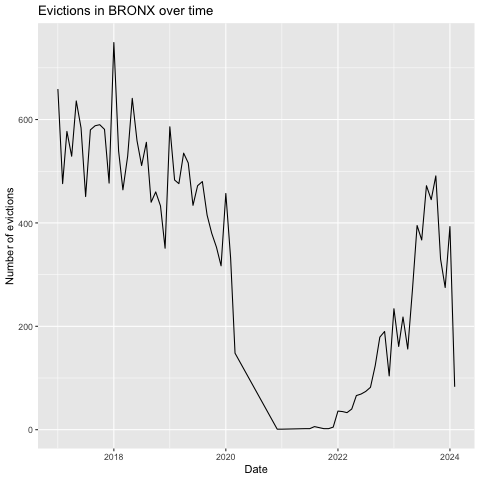

In [8]:
%%R -i df,selected_borough

# read as date column
df$`Executed Date` <- as.Date(df$`Executed Date`)

#extract year and month from the date
df$month_year = as.Date(format(df$`Executed Date`, "%Y-%m-01"))

# plot the number of evictions over time
df %>%
  group_by(month_year) %>%
  summarise(n = n()) %>%
  ggplot() +
    aes(x=month_year, y=n) + 
    geom_line() + 
    labs(
      title=paste("Evictions in",selected_borough, "over time"),
      x="Date",
      y="Number of evictions"
    )

In [9]:
# in python create a variable called df_pre (for pre-pandemic data) 
# that filters Executed Date from the data from july through december 2019
df_pre = df.query('`Executed Date` >= "2019-07-01"').query('`Executed Date` <= "2019-12-31"')

# in python create a variable called df_post (for post-pandemic data) 
# that filters Executed Date from the data from july through december 2023
df_post = df.query('`Executed Date` >= "2023-07-01"').query('`Executed Date` <= "2023-12-31"')

In [10]:
# PIVOT TABLE TO GET FROM ONE ROW PER EVICTION TO ONE ROW PER CENSUS TRACT

#in python group df by the following columns: GEOID	NAME	population_estimate	number_household_below_poverty_estimate	number_of_housing_units_estimate	median_household_inc_estimate	population_moe	number_household_below_poverty_moe	number_of_housing_units_moe	median_household_inc_moe	percent_below_poverty
tracts_pre = df_pre.groupby(['GEOID', 'NAME', 'BOROUGH', 'population_estimate', 'number_household_below_poverty_estimate', 'number_of_housing_units_estimate', 'median_household_inc_estimate', 
                 'population_moe', 'number_household_below_poverty_moe', 'number_of_housing_units_moe', 
                 'median_household_inc_moe']).agg({'Court Index Number': 'count'})\
                    .reset_index()\
                    .rename(columns={'Court Index Number': 'evictions'})
tracts_pre['eviction_rate'] = tracts_pre['evictions'] / tracts_pre['population_estimate'] * 100
tracts_pre['poverty_rate'] = tracts_pre['number_household_below_poverty_estimate'] / tracts_pre['population_estimate'] * 100
tracts_pre['pre_or_post'] = 'july-dec-2019'
tracts_pre.sort_values(by='eviction_rate', ascending=False)



,GEOID,NAME,BOROUGH,population_estimate,number_household_below_poverty_estimate,number_of_housing_units_estimate,median_household_inc_estimate,population_moe,number_household_below_poverty_moe,number_of_housing_units_moe,median_household_inc_moe,evictions,eviction_rate,poverty_rate,pre_or_post
26,36005006000,"Census Tract 60, Bronx County, New York",BRONX,1295,430,380,34239.0,363,110,72,8749.0,9,0.694981,33.204633,july-dec-2019
61,36005012701,"Census Tract 127.01, Bronx County, New York",BRONX,2207,569,756,34960.0,603,339,113,16044.0,12,0.543725,25.781604,july-dec-2019
74,36005014900,"Census Tract 149, Bronx County, New York",BRONX,4708,1969,1442,24375.0,1184,1202,151,10698.0,25,0.531011,41.822430,july-dec-2019
235,36005038700,"Census Tract 387, Bronx County, New York",BRONX,3582,1256,1375,39080.0,444,553,139,7403.0,18,0.502513,35.064210,july-dec-2019
261,36005041100,"Census Tract 411, Bronx County, New York",BRONX,3677,729,1437,38452.0,653,337,262,6866.0,18,0.489530,19.825945,july-dec-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,36005024800,"Census Tract 248, Bronx County, New York",BRONX,3370,190,1161,77731.0,538,126,165,16699.0,1,0.029674,5.637982,july-dec-2019
245,36005039700,"Census Tract 397, Bronx County, New York",BRONX,3689,252,409,28125.0,351,138,48,14891.0,1,0.027108,6.831120,july-dec-2019
176,36005027401,"Census Tract 274.01, Bronx County, New York",BRONX,5148,191,1768,82273.0,769,232,177,41456.0,1,0.019425,3.710179,july-dec-2019
185,36005029302,"Census Tract 293.02, Bronx County, New York",BRONX,6043,490,2676,116413.0,811,498,281,14092.0,1,0.016548,8.108555,july-dec-2019


In [11]:
# PIVOT TABLE TO GET FROM ONE ROW PER EVICTION TO ONE ROW PER CENSUS TRACT

#in python group df by the following columns: GEOID	NAME	population_estimate	number_household_below_poverty_estimate	number_of_housing_units_estimate	median_household_inc_estimate	population_moe	number_household_below_poverty_moe	number_of_housing_units_moe	median_household_inc_moe	percent_below_poverty
tracts_post = df_post.groupby(['GEOID', 'NAME', 'BOROUGH', 'population_estimate', 'number_household_below_poverty_estimate', 'number_of_housing_units_estimate', 'median_household_inc_estimate', 
                 'population_moe', 'number_household_below_poverty_moe', 'number_of_housing_units_moe', 
                 'median_household_inc_moe']).agg({'Court Index Number': 'count'})\
                    .reset_index()\
                    .rename(columns={'Court Index Number': 'evictions'})
tracts_post['eviction_rate'] = tracts_post['evictions'] / tracts_post['population_estimate'] * 100
tracts_post['poverty_rate'] = tracts_post['number_household_below_poverty_estimate'] / tracts_post['population_estimate'] * 100
tracts_post['pre_or_post'] = 'jul-dec-2023'
tracts_post.sort_values(by='eviction_rate', ascending=False)

,GEOID,NAME,BOROUGH,population_estimate,number_household_below_poverty_estimate,number_of_housing_units_estimate,median_household_inc_estimate,population_moe,number_household_below_poverty_moe,number_of_housing_units_moe,median_household_inc_moe,evictions,eviction_rate,poverty_rate,pre_or_post
207,36005035900,"Census Tract 359, Bronx County, New York",BRONX,2445,985,925,26442.0,352,305,136,8497.0,17,0.695297,40.286299,jul-dec-2023
119,36005022000,"Census Tract 220, Bronx County, New York",BRONX,1917,806,651,29625.0,492,408,88,11265.0,13,0.678143,42.044862,jul-dec-2023
230,36005038500,"Census Tract 385, Bronx County, New York",BRONX,5025,2657,1665,21875.0,810,947,180,5960.0,28,0.557214,52.875622,jul-dec-2023
240,36005039500,"Census Tract 395, Bronx County, New York",BRONX,4286,1523,1690,25211.0,926,781,372,15410.0,23,0.536631,35.534298,jul-dec-2023
196,36005033202,"Census Tract 332.02, Bronx County, New York",BRONX,3775,576,1642,44812.0,516,194,218,9800.0,20,0.529801,15.258278,jul-dec-2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,36005032600,"Census Tract 326, Bronx County, New York",BRONX,3643,400,1052,95071.0,645,247,145,6670.0,1,0.027450,10.979962,jul-dec-2023
261,36005041800,"Census Tract 418, Bronx County, New York",BRONX,3750,274,1241,67986.0,809,143,181,12619.0,1,0.026667,7.306667,jul-dec-2023
67,36005014400,"Census Tract 144, Bronx County, New York",BRONX,5781,1828,2422,18906.0,1070,534,312,8561.0,1,0.017298,31.620827,jul-dec-2023
69,36005014701,"Census Tract 147.01, Bronx County, New York",BRONX,5864,2507,2026,24279.0,1411,654,410,10179.0,1,0.017053,42.752387,jul-dec-2023


In [12]:
tracts = pd.concat([tracts_pre, tracts_post])
tracts.sort_values(by='poverty_rate', ascending=False)

,GEOID,NAME,BOROUGH,population_estimate,number_household_below_poverty_estimate,number_of_housing_units_estimate,median_household_inc_estimate,population_moe,number_household_below_poverty_moe,number_of_housing_units_moe,median_household_inc_moe,evictions,eviction_rate,poverty_rate,pre_or_post
4,36005002701,"Census Tract 27.01, Bronx County, New York",BRONX,2938,1665,1119,18686.0,583,640,123,3057.0,5,0.170184,56.671205,jul-dec-2023
5,36005002701,"Census Tract 27.01, Bronx County, New York",BRONX,2938,1665,1119,18686.0,583,640,123,3057.0,1,0.034037,56.671205,july-dec-2019
22,36005005300,"Census Tract 53, Bronx County, New York",BRONX,5472,3022,1664,20449.0,709,817,163,4459.0,23,0.420322,55.226608,july-dec-2019
21,36005005300,"Census Tract 53, Bronx County, New York",BRONX,5472,3022,1664,20449.0,709,817,163,4459.0,19,0.347222,55.226608,jul-dec-2023
109,36005020501,"Census Tract 205.01, Bronx County, New York",BRONX,7267,3943,2663,19147.0,1252,1099,175,4008.0,16,0.220173,54.258979,july-dec-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,36005045101,"Census Tract 451.01, Bronx County, New York",BRONX,1490,36,929,54986.0,315,33,288,29084.0,2,0.134228,2.416107,jul-dec-2023
186,36005030701,"Census Tract 307.01, Bronx County, New York",BRONX,5718,129,2392,128919.0,1016,88,145,16789.0,3,0.052466,2.256034,jul-dec-2023
190,36005030701,"Census Tract 307.01, Bronx County, New York",BRONX,5718,129,2392,128919.0,1016,88,145,16789.0,2,0.034977,2.256034,july-dec-2019
199,36005034300,"Census Tract 343, Bronx County, New York",BRONX,1899,40,602,83991.0,294,33,81,16557.0,1,0.052659,2.106372,jul-dec-2023


## T-Tests

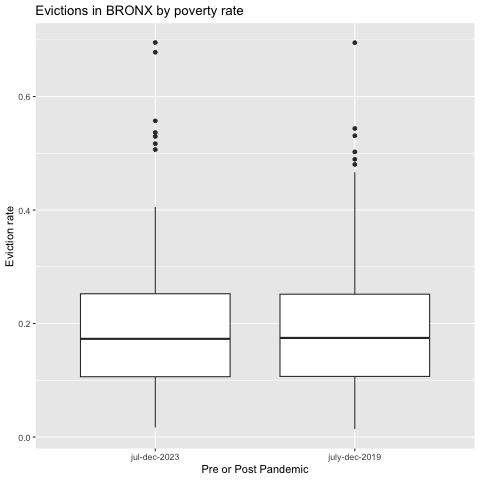

In [22]:
%%R -i tracts,selected_borough
# Plot boxplot X=pre_or_post, Y=eviction_rate
tracts %>%
  ggplot() +
    aes(x=pre_or_post, y=eviction_rate) + 
    geom_boxplot() + 
    labs(
      title=paste("Evictions in",selected_borough, "by poverty rate"),
      x="Pre or Post Pandemic",
      y="Eviction rate"
    )


In [14]:
%%R
# run a t test to see if the means are different
t.test(tracts$eviction_rate ~ tracts$pre_or_post)


	Welch Two Sample t-test

data:  tracts$eviction_rate by tracts$pre_or_post
t = 0.045997, df = 569.45, p-value = 0.9633
alternative hypothesis: true difference in means between group jul-dec-2023 and group july-dec-2019 is not equal to 0
95 percent confidence interval:
 -0.01756257  0.01840486
sample estimates:
 mean in group jul-dec-2023 mean in group july-dec-2019 
                  0.1873434                   0.1869223 



## Chi-SQ Tests

In [15]:
# CHI - SQ TESTS HELP YOU CHECK IF TWO BUCKETS ARE DIFFERENT OR NOT
# BUT, BOTH VARIABLES HAVE TO BE DISCRETE

# X = pre_or_post
# Y = ???????



In [16]:
# run chi sq test


## Linear Regressions (single variable)

`geom_smooth()` using formula = 'y ~ x'


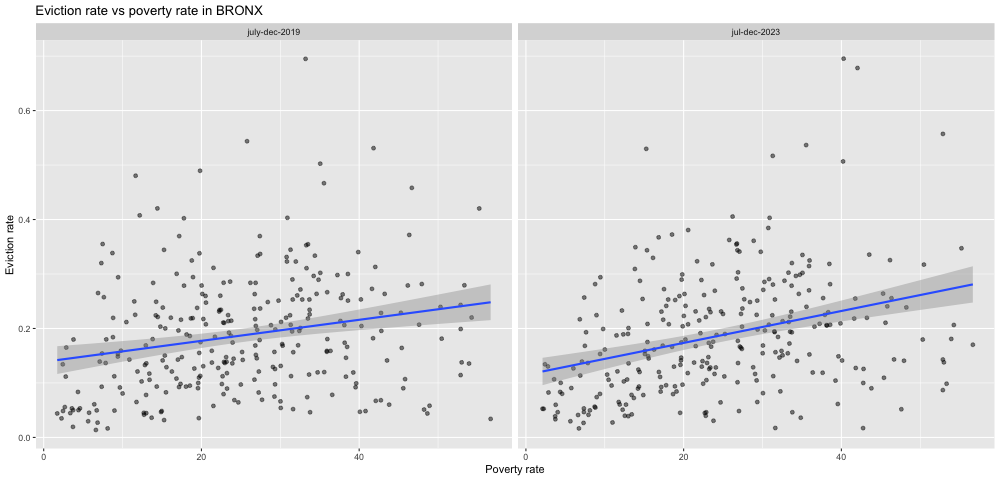

In [23]:
%%R -i tracts,selected_borough -w 1000

# require('ggrepel')

tracts$pre_or_post = factor(tracts$pre_or_post, levels=c('july-dec-2019', 'jul-dec-2023'))

# Plotting using R
plt <- ggplot(tracts) +
    aes(y=eviction_rate, x=poverty_rate) +
    geom_point(alpha=.5) +
    geom_smooth(method='lm') +
    facet_wrap(~pre_or_post) + 
    labs(
      title=paste("Eviction rate vs poverty rate in",selected_borough),
      x="Poverty rate",
      y="Eviction rate"
    )

plt

In [20]:
%%R -i tracts_pre

# Linear regression (Y~X)
model = lm(eviction_rate ~ poverty_rate, data=tracts_pre)
summary(model)


Call:
lm(formula = eviction_rate ~ poverty_rate, data = tracts_pre)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.21407 -0.07962 -0.01238  0.05393  0.49219 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.138657   0.013698  10.123  < 2e-16 ***
poverty_rate 0.001931   0.000488   3.958 9.54e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1059 on 286 degrees of freedom
Multiple R-squared:  0.05193,	Adjusted R-squared:  0.04861 
F-statistic: 15.67 on 1 and 286 DF,  p-value: 9.544e-05



In [21]:
%%R -i tracts_post

# Linear regression (Y~X)
model = lm(eviction_rate ~ poverty_rate, data=tracts_post)
summary(model)


Call:
lm(formula = eviction_rate ~ poverty_rate, data = tracts_post)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.22310 -0.07538 -0.01588  0.05474  0.46237 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.1149105  0.0136742   8.403 2.16e-15 ***
poverty_rate 0.0029294  0.0004932   5.940 8.38e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1043 on 282 degrees of freedom
Multiple R-squared:  0.1112,	Adjusted R-squared:  0.1081 
F-statistic: 35.28 on 1 and 282 DF,  p-value: 8.376e-09



In [ ]:

t.test(tracts, tracts_post$eviction_rate)